In [8]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score


KNN (K-Nearest Neighbors) es un algoritmo de aprendizaje supervisado usado para clasificación y regresión. Su principio es simple: predice un valor o categoría basado en los K vecinos más cercanos en el espacio de características.


1- Se elige un número  K de vecinos (hiperparámetro).

2- Para una nueva observación, se calculan las distancias con todos los datos de entrenamiento.

3- Se seleccionan los  K vecinos más cercanos. 

4- Se predice el promedio de los valores de los K vecinos.


## Para determinar los vecinos más cercanos

### Definición General
La distancia euclidiana entre dos puntos \( A \) y \( B \) en un espacio \( n \)-dimensional se define como:

$$
d(A, B) = \sqrt{\sum_{i=1}^{n} (x_i^A - x_i^B)^2}
$$

#### Casos Específicos

### Caso en Dos Dimensiones
En un espacio bidimensional (\( n = 2 \)):

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

### Caso en Tres Dimensiones
En un espacio tridimensional (\( n = 3 \)):

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}
$$

**Ejemplo Numérico:**
Si tenemos los puntos \( A(1,2,3) \) y \( B(4,6,8) \), la distancia euclidiana es:

$$
d(A, B) = \sqrt{(4 - 1)^2 + (6 - 2)^2 + (8 - 3)^2} = \sqrt{9 + 16 + 25} = \sqrt{50} \approx 7.07
$$



In [23]:
### Ejemplo distancie uclidiana

In [2]:
df = pd.read_csv('housing.csv')
df = pd.get_dummies(df)
df['total_bedrooms'] = df['total_bedrooms'].fillna(df.total_bedrooms.mean())

In [20]:
### Crea el modelo KNN y realiza cross validation 

In [3]:
target = 'median_house_value'

In [5]:
# Sin estandarizar
X = df.copy()
X = X.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = KNeighborsRegressor().fit(X_train, y_train)
predicciones = model.predict(X_test)

r2_score(y_test, predicciones)

0.2235014177478798

In [6]:
# Estandarizando
X = df.copy()
X = X.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

model = KNeighborsRegressor().fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)

r2_score(y_test, predicciones)

0.7093092834369912

In [11]:
nn = []
r2 = []
r2_train = []
for i in range(1, 60):
    model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_test, predicciones))
    nn.append(i)
    predicciones_train = model.predict(X_train_scaled)
    r2_train.append(r2_score(y_train, predicciones_train))

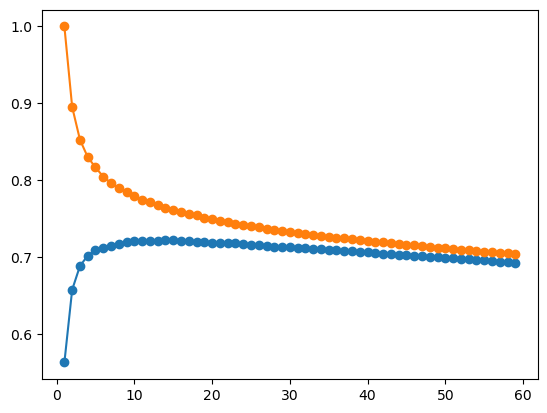

In [12]:
## Grafica los resultados
resultados = pd.DataFrame({
    'nn': nn,
    'r2': r2,
    'r2_train': r2_train
})

plt.plot(resultados.nn, resultados.r2, marker='o')
plt.plot(resultados.nn, resultados.r2_train, marker='o');